In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

### Definition of the model

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, gamma,beta1,beta2,t_tresh=22):
    S,I,R = y

    if t<=t_tresh:
        B=beta1
    else:
        B=beta1*np.exp(-(t-t_tresh)/beta2)
    
    dSdt = -(B*I/N)*S 
    dIdt = (B*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

### Integration of the differential equations

In [3]:
def time_evo(N,beta1,beta2,gamma,death_rate,t_tresh=22,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,gamma,beta1,beta2,t_tresh))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,(1-death_rate/100)*R,R*death_rate/100)

### Show the result

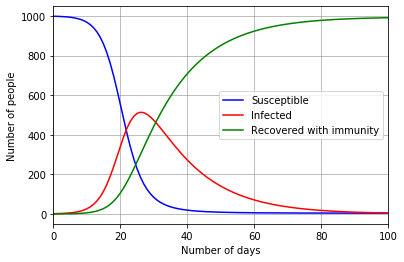

In [20]:
fin_result=time_evo(1000,0.4,10000,1/14,0)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered with immunity')
#plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend()
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

#print(s_vec+i_vec+r_vec+m_vec)

### removing part of infected people

In [58]:
# The SIR model differential equations.
def deriv2(y, t, N, gamma,beta,beta2,f_iso):
    S,Isym,Iasym,Iso,R = y
    
    dSdt = -(beta*(Isym*(1-f_iso))/N)*S - beta2*Iasym/N*S
    dIsymdt=(beta*S/N)*Isym*(1-f_iso) - gamma*Isym
    dIasymdt = (beta2*S/N)*Iasym - gamma*Iasym
    dIsodt = gamma*Isym*f_iso
    dRdt = gamma*(Isym*(1-f_iso)+Iasym) 
    
    return dSdt, dIsymdt,dIasymdt,dIsodt, dRdt


def time_evo2(N,beta,beta2,gamma,f_iso,I0sym=1,I0asym=1,I0iso=0,R0=0,t=np.arange(0,720)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0sym-I0asym-I0iso-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0sym,I0asym,I0iso, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv2, y0, t, args=(N,gamma,beta,beta2,f_iso))
    S, Isym,Iasym,Iiso, R = np.transpose(ret)
    
    return (t,S,Isym,Iasym,Iiso,R)

0.7


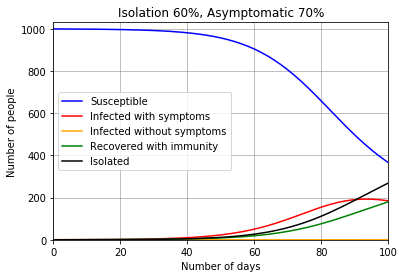

In [60]:
isolation=60
asymptomatic=70
n_asym=asymptomatic/100
n_sym=1-n_asym

print(n_asym)

fin_result2=time_evo2(1000,0.4,0.04,1/14,f_iso=isolation/100,I0sym=n_sym,I0asym=n_asym)

t2=fin_result2[0]
s_vec2=fin_result2[1]
isym_vec2=fin_result2[2]
iasym_vec2=fin_result2[3]
isolated_vec2=fin_result2[4]
r_vec2=fin_result2[5]

plt.plot(t2, s_vec2, 'b', label='Susceptible')
#plt.plot(t2, isym_vec2+iasym_vec2, color='red', label='Infected')
plt.plot(t2, isym_vec2, color='red', label='Infected with symptoms')
plt.plot(t2, iasym_vec2, color='orange', label='Infected without symptoms')
plt.plot(t2, r_vec2, 'g', label='Recovered with immunity')
plt.plot(t2, isolated_vec2,color='black',label='Isolated')
#plt.plot(t2, m_vec2, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend()
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.ylim(0,1030)
plt.title('Isolation '+str(isolation)+'%, Asymptomatic '+str(asymptomatic)+'%')
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.savefig('output2/sir_isolation'+str(isolation)+'-asymptomatic_'+str(asymptomatic)+'.png',dpi=300)
plt.show()

#print(s_vec+i_vec+r_vec+m_vec)

In [7]:
tot=s_vec2+isym_vec2+iasym_vec2+isolated_vec2+r_vec2

np.mean(tot)

1000.0000000000003

### combined plot

1
2
3
4
5
6
7
8
9
10
11
12


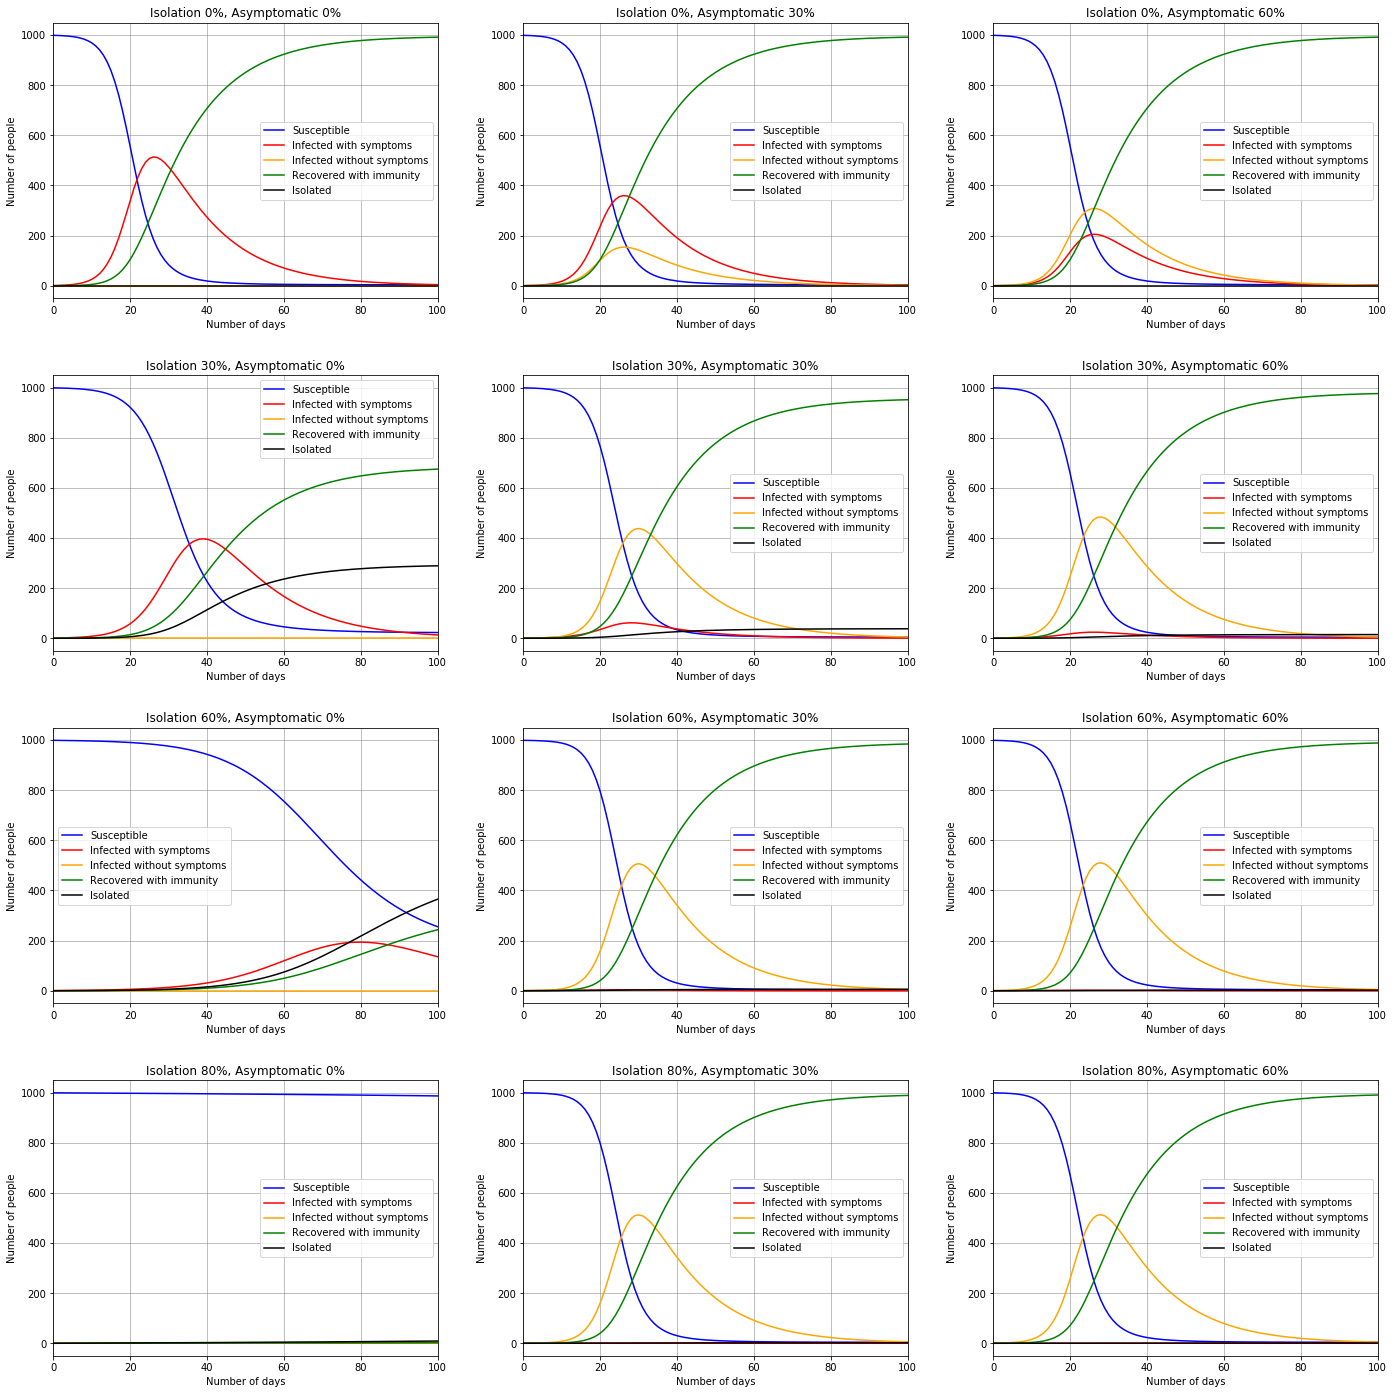

In [61]:
isolation_grid=[0,30,60,80]
asymptomatic_grid=[0,30,60]
counter=0

plt.figure(figsize=(20,20))
for isolation in isolation_grid:
    for asymptomatic in asymptomatic_grid:
        n_asym=asymptomatic/100
        n_sym=1-n_asym
        counter=counter+1
        print(counter)
        #print(n_asym)

        fin_result2=time_evo2(1000,0.4,0.4,1/14,f_iso=isolation/100,I0sym=n_sym,I0asym=n_asym)

        t2=fin_result2[0]
        s_vec2=fin_result2[1]
        isym_vec2=fin_result2[2]
        iasym_vec2=fin_result2[3]
        isolated_vec2=fin_result2[4]
        r_vec2=fin_result2[5]

        plt.subplot(4,3,counter)
        plt.plot(t2, s_vec2, 'b', label='Susceptible')
        #plt.plot(t2, isym_vec2+iasym_vec2, color='red', label='Infected')
        plt.plot(t2, isym_vec2, color='red', label='Infected with symptoms')
        plt.plot(t2, iasym_vec2, color='orange', label='Infected without symptoms')
        plt.plot(t2, r_vec2, 'g', label='Recovered with immunity')
        plt.plot(t2, isolated_vec2,color='black',label='Isolated')
        #plt.plot(t2, m_vec2, 'k', label='Deaths')
        #plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
        plt.legend()
        #plt.yscale('log')
        #plt.ylim(0.5,3000)
        plt.xlim(0,100)
        #plt.ylim(0,1030)
        plt.title('Isolation '+str(isolation)+'%, Asymptomatic '+str(asymptomatic)+'%')
        plt.xlabel('Number of days')
        plt.ylabel('Number of people')
        plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.tight_layout(pad=3.0)
plt.savefig('output2/sir_compete_case.png',dpi=300)
plt.show()

#print(s_vec+i_vec+r_vec+m_vec)

## Nothing vs containment vs strong isolation

In [225]:
# The SIR model differential equations.
def SIR_simple(y, t, N, beta1,beta2,gamma,choice='simple',t_thresh=15,isolated_frac=0.8):
    S,I,R = y
    
    if choice=='simple':
        dSdt = -(beta1*I/N)*S 
        dIdt = (beta1*S/N)*I - gamma*I 
        dRdt = gamma*I 
        
    elif choice=='containment':
        if t<=t_thresh:
            beta=beta1
        else:
            beta=beta1*np.exp(-(t-t_thresh)/beta2)
        
        dSdt = -(beta*I/N)*S 
        dIdt = (beta*S/N)*I - gamma*I 
        dRdt = gamma*I 
        
    elif choice=='isolation':
        if t<=t_thresh:
            dSdt = -(beta1*I/N)*S 
            dIdt = (beta1*S/N)*I - gamma*I 
            dRdt = gamma*I 
        else:
            dSdt = -(beta1*I*(1-isolated_frac)/N)*S 
            dIdt = (beta1*S/N)*I*(1-isolated_frac) - gamma*I
            dRdt = gamma*I
        
    
    return dSdt, dIdt, dRdt


def SIR_simple_timeevo(N,beta1,beta2,gamma,t_thresh=15,choice='simple',isolated_frac=0.8,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(SIR_simple, y0, t, args=(N,beta1,beta2,gamma,choice,t_thresh,isolated_frac))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

In [275]:
def iso_thresh(N,S,beta,gamma):
    R0_thresh=beta*S/(N*gamma)
    
    return 1-(gamma*N)/(beta*S)

iso_thresh(10**3,10**3,0.415,1/14)

0.8278829604130808

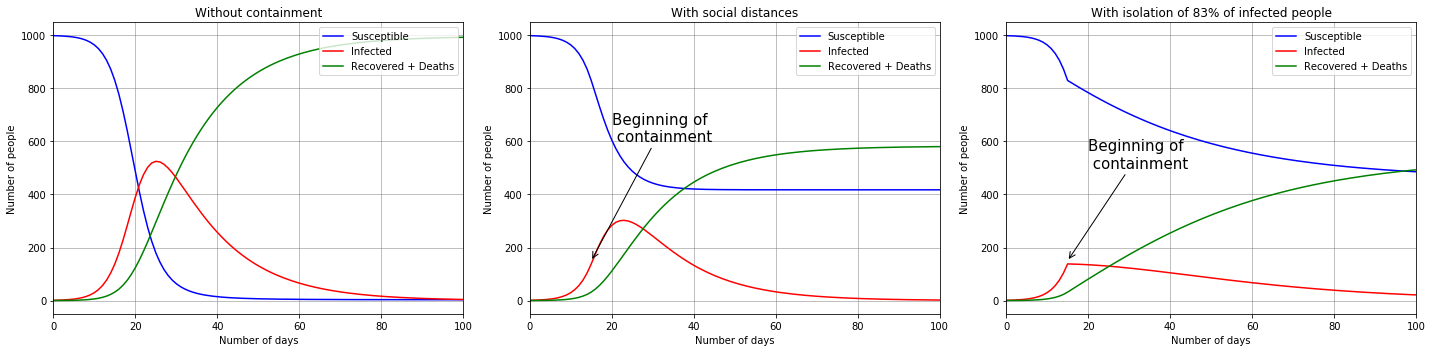

In [276]:
t0=15
NN=10**3


# simple
fin_result_S=SIR_simple_timeevo(NN,0.415,10,1/14,t_thresh=t0,choice='simple',isolated_frac=0.8)
t_S=fin_result_S[0]
s_vec_S=fin_result_S[1]
i_vec_S=fin_result_S[2]
r_vec_S=fin_result_S[3]

# social distancing
fin_result_C=SIR_simple_timeevo(NN,0.415,7,1/14,t_thresh=t0,choice='containment',isolated_frac=0.8)
t_C=fin_result_C[0]
s_vec_C=fin_result_C[1]
i_vec_C=fin_result_C[2]
r_vec_C=fin_result_C[3]

# isolation
fin_result=SIR_simple_timeevo(NN,0.415,10,1/14,t_thresh=t0,choice='isolation',isolated_frac=0.8)
t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]

plt.figure(figsize=(20,5))
# 1st subplot
plt.subplot(1,3,1)
plt.plot(t_S, s_vec_S, 'b', label='Susceptible')
plt.plot(t_S, i_vec_S, 'r', label='Infected')
plt.plot(t_S, r_vec_S, 'g', label='Recovered + Deaths')
plt.xlim(0,100)
plt.title('Without containment')
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.legend(loc=1)
# 2nd subplot
plt.subplot(1,3,2)
plt.plot(t_C, s_vec_C, 'b', label='Susceptible')
plt.plot(t_C, i_vec_C, 'r', label='Infected')
plt.plot(t_C, r_vec_C, 'g', label='Recovered + Deaths')
plt.xlim(0,100)
plt.annotate("Beginning of \n containment", xy=(t0,150), xytext=(20, 600), arrowprops=dict(arrowstyle="->"),fontsize=15)
plt.title('With social distances')
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.legend(loc=1)
# 3rd subplot
plt.subplot(1,3,3)
plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered + Deaths')
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.xlim(0,100)
plt.annotate("Beginning of \n containment", xy=(t0,150), xytext=(20, 500), arrowprops=dict(arrowstyle="->"),fontsize=15)
plt.legend(loc=1)
plt.title('With isolation of 83% of infected people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('output2/comp_3plot.png',dpi=300)
plt.show()